In [ ]:
import httplib2
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
from datetime import datetime

countrySummary = 'https://covidtracking.com/api/us/daily'
statesCurrent = 'https://covidtracking.com/api/states/daily'
h = httplib2.Http('.cache')

# Get data
(response,stateDataRaw) = h.request(statesCurrent,'GET', headers={'cache-control': 'no-cache'})
stateDataDf = pd.DataFrame(json.loads(stateDataRaw.decode('UTF-8')))

(response,countryRaw) = h.request(countrySummary,'GET')
countryJson = json.loads(countryRaw.decode('UTF-8'))
countryDf = pd.DataFrame(countryJson).sort_values(by=['date']).reset_index()

print(stateDataDf.columns.values)

In [ ]:
# Create figure/axes
growthCharts, (statesPositive, statesPositiveLog, stateDeaths, stateDeathsLog) = plt.subplots(nrows=4,ncols=1,figsize=(15,40))

statesPositive.set_title('State Daily Positive')
statesPositive.minorticks_on()
statesPositiveLog.set_title('State Daily Positive (Log2)')
statesPositiveLog.set_yscale('log', basey=2)
statesPositiveLog.minorticks_on()
stateDeaths.set_title('State Daily Deaths')
stateDeaths.minorticks_on()
stateDeathsLog.set_title('State Daily Deaths (Log2)')
stateDeathsLog.set_yscale('log', basey=2)
stateDeathsLog.minorticks_on()

stateList = ['UT','WA','CA','NY','TX','AL','FL','KS','MI','LA','OH','IL','NC','VA']
dates = pd.date_range('03/01/2020', datetime.today())
for state in stateList: 
    reducedData = stateDataDf[stateDataDf['state']==state][['state','date','positive','death']].sort_values(by='date')
    reducedData['date'] = reducedData['date'].apply(convertToDate)
    reducedData.plot.line(ax=statesPositive,x='date', y='positive', marker='o',label=state,grid=True)
    reducedData.plot.line(ax=statesPositiveLog,x='date', y='positive', marker='o',label=state,grid=True)
    reducedData.plot.line(ax=stateDeaths,x='date', y='death', marker='o',label=state,grid=True)
    reducedData.plot.line(ax=stateDeathsLog,x='date', y='death', marker='o',label=state,grid=True)
    




In [ ]:
# Create figure/axes
stateFig, (utahDailyTested,utahTotalTests, utahTotalDeaths) = plt.subplots(nrows=3,ncols=1,figsize=(15,15))

utahDataDf = stateDataDf[stateDataDf['state']=='UT'].sort_values(by=['date']).reset_index()
utahDataDf['dateStr'] = utahDataDf['date'].apply(convertToDate)
utahDataDf['dailyTested'] = utahDataDf['total'].diff()
utahDataDf['dailyTested3sma'] = utahDataDf['dailyTested'].rolling(window=3).mean()

utahDataDf['dailyPositive'] = utahDataDf['positive'].diff()
utahDataDf['dailyPositive3sma'] = utahDataDf['dailyPositive'].rolling(window=3).mean()

utahDataDf['pctChangeTested'] = utahDataDf['total'].pct_change(fill_method='pad')
utahDataDf['pctChangeDeaths'] = utahDataDf['death'].pct_change(fill_method='pad')

# Draw Utah data
utahTotalTests.set_title('Total Tests (UT)')
utahDailyTested.set_title('Daily Tests (UT)')

utahDataDf[['dailyTested','dailyPositive']].plot.bar(ax=utahDailyTested, color=['blue','orange'])
utahDataDf['dailyTested3sma'].plot.line(ax=utahDailyTested, color='magenta', marker='o')
utahDataDf['dailyPositive3sma'].plot.line(ax=utahDailyTested, color='green', marker='o')
utahDataDf[['total', 'positive']].plot.bar(ax=utahTotalTests, use_index=True, color=['blue','orange'])
utahDataDf['death'].plot.bar(ax=utahTotalDeaths, color='blue')

utahTotalTests.legend()
utahTotalTests.grid()
utahTotalTests.minorticks_on()
utahTotalTests.set_xticklabels(utahDataDf['dateStr'], {'rotation':45})

utahDailyTested.legend()
utahDailyTested.grid()
utahDailyTested.minorticks_on()
utahDailyTested.set_xticklabels(utahDataDf['dateStr'], {'rotation':45})

stateFig.autofmt_xdate()
stateFig.tight_layout()

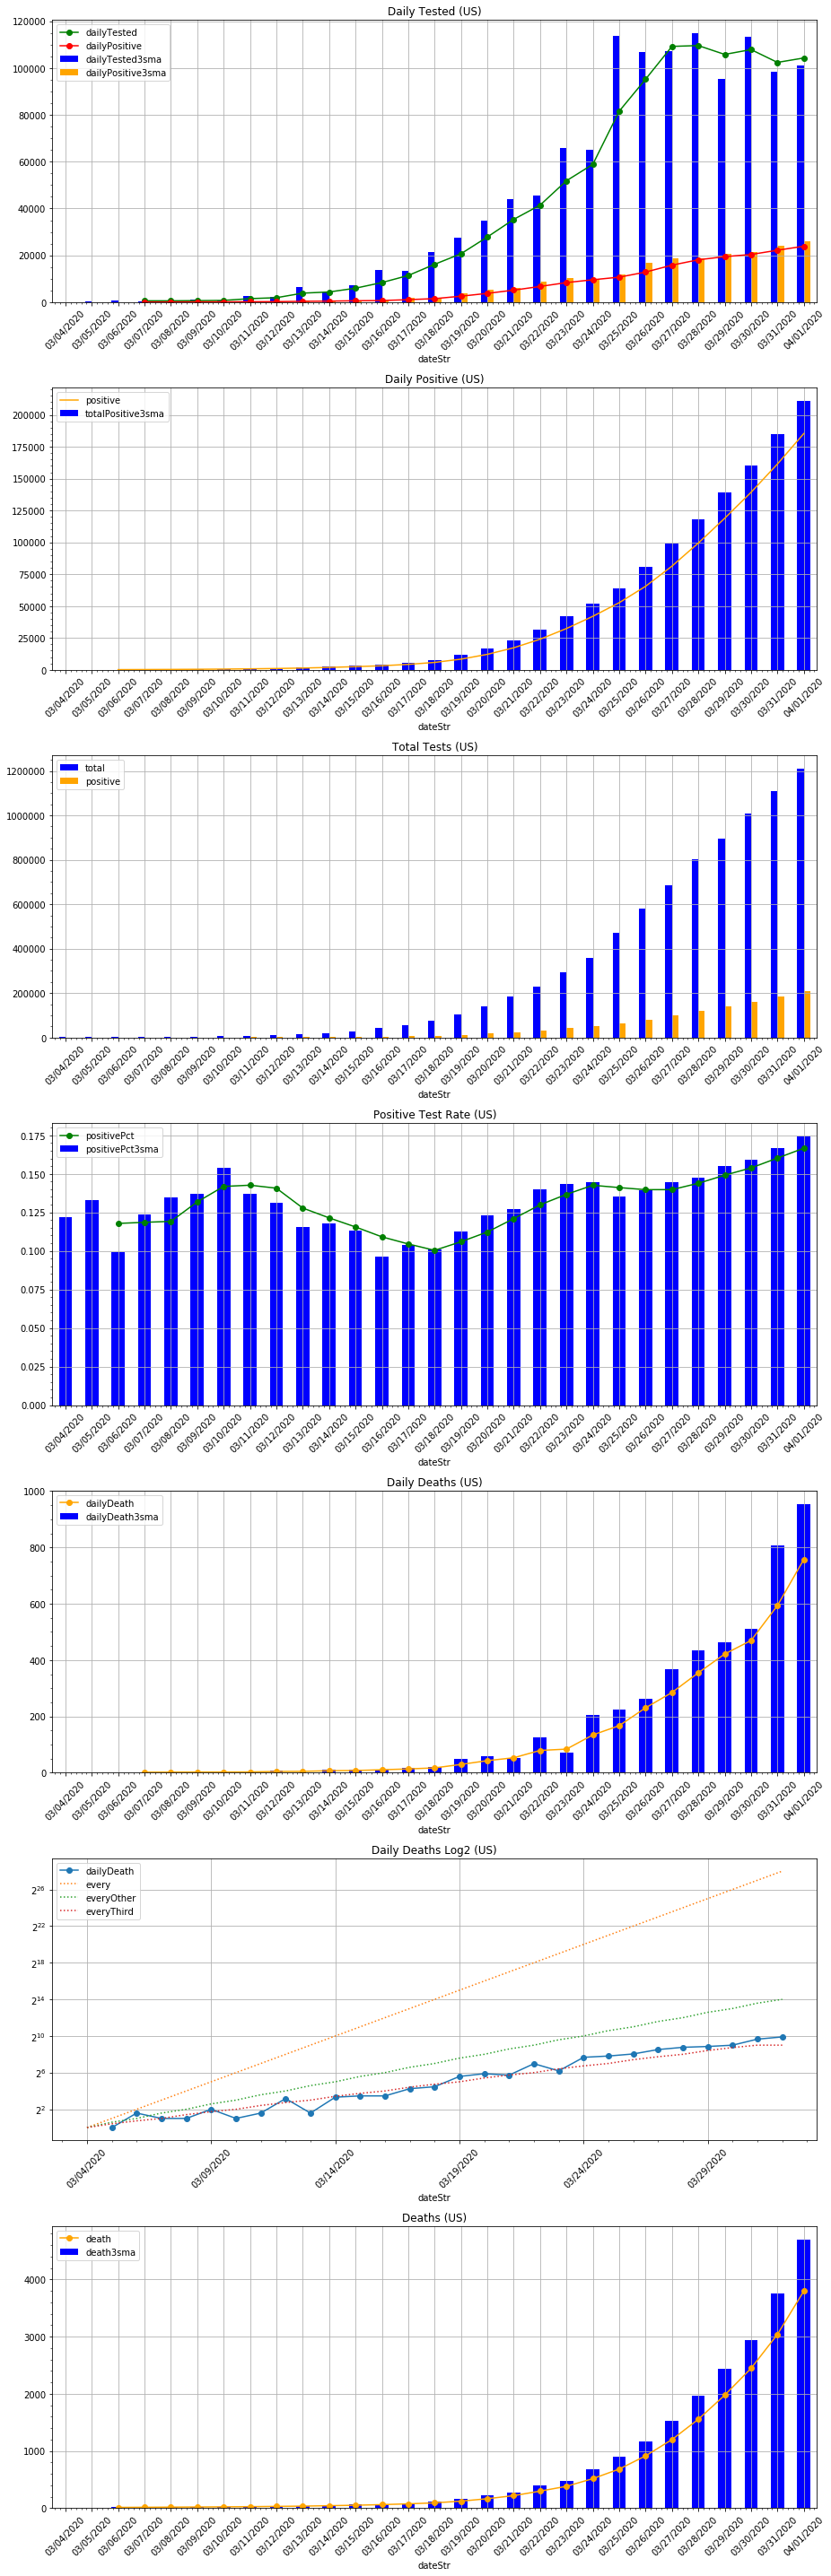

In [46]:
# Create figure/axes
countryFig, (usDailyTested,usTotalPositive,usTotalTests,usPositivePct,usDailyDeaths,usDailyDeathsLog2,usDeaths) = plt.subplots(nrows=7,ncols=1,figsize=(13,40))

# Get US data       
countryDf['dateStr'] = countryDf['date'].apply(lambda s: pd.to_datetime(str(s)).strftime('%m/%d/%Y'))
countryDf['dailyTested'] = countryDf['total'].diff()
countryDf['dailyTested3sma'] = countryDf['dailyTested'].rolling(window=3).mean()
countryDf['totalPositive3sma'] = countryDf['positive'].rolling(window=3).mean()
countryDf['dailyPositive'] = countryDf['positive'].diff()
countryDf['dailyPositive3sma'] = countryDf['dailyPositive'].rolling(window=3).mean()
countryDf['positivePct'] = countryDf.apply(lambda o: o['positive']/o['total'], axis=1)
countryDf['positivePct3sma'] = countryDf['positivePct'].rolling(window=3).mean()
countryDf['dailyDeath'] = countryDf['death'].diff()
countryDf['dailyDeath3sma'] = countryDf['dailyDeath'].rolling(window=3).mean()
countryDf['death3sma'] = countryDf['death'].rolling(window=3).mean()
countryDf['pctChangeTested'] = countryDf['total'].pct_change(fill_method='pad')
countryDf['pctChangeDeaths'] = countryDf['death'].pct_change(fill_method='pad')
countryDf['presumptivePositives'] = countryDf['death'].apply(lambda d:  d/.02)
countryDfIndexed = countryDf.set_index(countryDf['dateStr'])

# Draw country data
usDailyTested.set_title('Daily Tested (US)')
usTotalPositive.set_title('Daily Positive (US)')
usPositivePct.set_title('Positive Test Rate (US)')
usTotalTests.set_title('Total Tests (US)')
usDailyDeaths.set_title('Daily Deaths (US)')
usDailyDeathsLog2.set_title('Daily Deaths Log2 (US)')
usDeaths.set_title('Deaths (US)')

countryDfIndexed.plot.bar(ax=usDailyTested,y=['dailyTested','dailyPositive'], color=['blue','orange'])
countryDfIndexed.plot.line(ax=usDailyTested,y=['dailyTested3sma','dailyPositive3sma'], color=['green','red'], marker='o',grid=True, rot=45)
countryDfIndexed.plot.bar(ax=usTotalPositive,y='positive',color='blue')
countryDfIndexed.plot.line(ax=usTotalPositive,y='totalPositive3sma',color='orange',grid=True, rot=45)
countryDfIndexed.plot.bar(ax=usPositivePct,y='positivePct',color='blue')
countryDfIndexed.plot.line(ax=usPositivePct,y='positivePct3sma', color='green', marker='o',grid=True, rot=45)
countryDfIndexed.plot.bar(ax=usDailyDeaths,y='dailyDeath', color='blue')
countryDfIndexed.plot.line(ax=usDailyDeaths,y='dailyDeath3sma',color='orange', marker='o',grid=True, rot=45)
countryDfIndexed.plot.bar(ax=usDeaths,y='death',color='blue')
countryDfIndexed.plot.line(ax=usDeaths,y='death3sma', color='orange',marker='o',grid=True, rot=45)
countryDfIndexed.plot.bar(ax=usTotalTests,y=['total','positive'], color=['blue','orange'],grid=True, rot=45)

dates = countryDfIndexed['dateStr']
double = pd.DataFrame(2**np.arange(0,dates.size),index=dates,columns=['every'])
everyOtherDate = countryDfIndexed['dateStr'].iloc[::2]
everyOther = pd.DataFrame(2**np.arange(0,everyOtherDate.size),index=everyOtherDate,columns=['everyOther'])
everyThirdDate = countryDfIndexed['dateStr'].iloc[::3]
everyThird = pd.DataFrame(2**np.arange(0,everyThirdDate.size), index=everyThirdDate, columns=['everyThird'])
countryDfIndexed = countryDfIndexed.join(double).join(everyOther).join(everyThird).interpolate()

countryDfIndexed.plot.line(ax=usDailyDeathsLog2,y='dailyDeath', marker='o')
countryDfIndexed.plot.line(ax=usDailyDeathsLog2,y='every', linestyle=':')
countryDfIndexed.plot.line(ax=usDailyDeathsLog2,y='everyOther', linestyle=':')
countryDfIndexed.plot.line(ax=usDailyDeathsLog2,y='everyThird', linestyle=':',grid=True, rot=45)
usDailyDeathsLog2.set_yscale('log', basey=2)

usDailyTested.minorticks_on()
usTotalPositive.minorticks_on()
usTotalTests.minorticks_on()
usPositivePct.minorticks_on()
usDailyDeaths.minorticks_on()
usDailyDeathsLog2.minorticks_on()
usDeaths.minorticks_on()

countryFig.tight_layout()


In [ ]:
regionFig, ((wcd,imd),(umd,mwd),(sod,sed),(ned,pacd)) = plt.subplots(nrows=4,ncols=2,figsize=(15,15))

westCoast=['WA','OR','CA'] 
interMountain=['MT','ID','UT','WY','CO','AZ','NM','NV']
upperMid=['ND','SD','MI','WI','MN']
midWest=['NE','IA','IL','IN','KS','MO','OH']
south=['TX','OK','AK','LA','MI','KY','TN']
southEast=['AL','GA','FL','SC','NC']
northEast=['ME','MA','VT','NH','NY','PA','WV','VA','RI','NJ','MD','DE','CT']
pacific=['AK','HI']

graphs = [ 
    {'states': westCoast,'axes': wcd},
    {'states': interMountain, 'axes': imd},
    {'states': upperMid, 'axes': umd},
    {'states': midWest, 'axes': mwd},
    {'states': south, 'axes': sod},
    {'states': southEast, 'axes': sed},
    {'states': northEast, 'axes': ned},
    {'states': pacific, 'axes': pacd}
]

regionFig.tight_layout()
dates = pd.date_range('03/01/2020', datetime.today())
for graph in graphs:
    states = graph['states']
    axes = graph['axes']
    for state in states:
        reducedData = stateDataDf[stateDataDf['state']==state][['state','date','positive','death']].sort_values(by='date')
        reducedData['date'] = reducedData['date'].apply(convertToDate)
        reducedData.plot.line(ax=axes,x='date', y='death', marker='o',label=state,logy=True)

